x	y
190 	 7.61999982967973 	 0.490639209312534
191 	 7.65999982878566 	 0.455691488003498
192 	 7.69999982789159 	 0.406409273266598
193 	 7.73999982699752 	 0.415502863882345
194 	 7.77999982610345 	 0.407560145189326
195 	 7.81999982520938 	 0.404962958291543
196 	 7.85999982431531 	 0.372513849972654
197 	 7.89999982342124 	 0.379461729293317
198 	 7.93999982252717 	 0.393824595632994
199 	 7.9799998216331 	 0.389386528323282
200 	 8.01999982073903 	 0.403822653641382
201 	 8.05999981984496 	 0.428733317492705
202 	 8.09999981895089 	 0.3837564779446
203 	 8.13999981805682 	 0.397768886432726
204 	 8.17999981716275 	 0.425760844860667
205 	 8.21999981626868 	 0.425867104419563
206 	 8.25999981537461 	 0.441813713723175
207 	 8.29999981448054 	 0.441261973203753
208 	 8.33999981358647 	 0.488751918710813
209 	 8.3799998126924 	 0.506307624745944
210 	 8.41999981179833 	 0.545508390132874
211 	 8.45999981090426 	 0.571494097074154
212 	 8.49999981001019 	 0.547183634009355
213 	 8.539

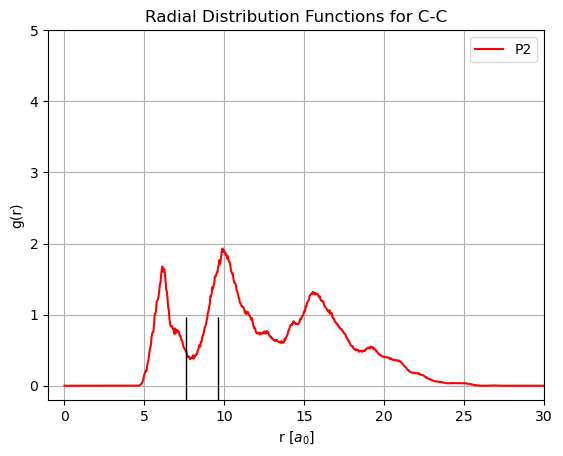

In [27]:
import matplotlib.pyplot as plt
from scipy import integrate
import math

pressure = 2
pair = '221' #pairs = ['111','121', '131', '221', '231','331']

################ CHANGE ACCORDING TO ATOM TYPE
cell_lengths = [33.7316000000000, 32.0000000000000, 30.0000000000000, 28.4944116841394, 28.0563780094177, 26.8879850364710]
volume = cell_lengths[pressure-1] ** 3

if pair[1] == '1':
    no_of_atoms = 192
elif pair[1] == '2':
    no_of_atoms = 64
elif pair[1] == '3':
    no_of_atoms = 128
else:
    print('SOMETHING IS WRONG WITH THE PAIR')

rho = no_of_atoms / volume

######################

def calculate_cn(x_values, y_values, index_at_min, rho):
    to_be_integrated = [y * (x**2) for y, x in zip(y_values[:index_at_min], x_values[:index_at_min])]
    integral = integrate.trapezoid(to_be_integrated, x_values[:index_at_min])
    coordination_number = 4 * math.pi * rho * integral
    print('The coordination number is ' + str(coordination_number))

def pick_range(lower_index, upper_index, x_values, y_values):
    plt.plot(x_values[lower_index],0, marker = '|', color = 'black', markersize = 100)
    plt.plot(x_values[upper_index],0, marker = '|', color = 'black', markersize = 100)
    min_index = None
    if upper_index - lower_index <= 50:
        print('x\ty')
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            print(index+lower_index, '\t', values[0], '\t', values[1])
        lowest_value = min(y_values[lower_index:upper_index])
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            if values[1] == lowest_value:
                print('The first minimum is at index ' + str(index+lower_index) + ' with x = ' + str(values[0]) + ' and y = ' + str(values[1])+'.')
                min_index = index + lower_index
                break
    return min_index

#######

parent_directory = 'D:/MSc/summer_project/'
directory = 'D:/MSc/summer_project/p' + str(pressure)
file_path = directory + '/rdf.out' + pair + '.txt'
with open(file_path, 'r') as file:
    data = file.readlines()
    x_values = []
    y_values = []
    for line in data:
        x, y = map(float, line.split())
        x_values.append(x)
        y_values.append(y)
        
label = 'P' + str(pressure)
colour = 'red'
plt.plot(x_values, y_values, label = label, color = colour)

plt.legend()
plt.xlim(-1,30)
plt.ylim(-0.2,5)
plt.xlabel('r [$a_0$]')
plt.ylabel('g(r)')
plt.grid(True)

title_label = ''
for character in pair[:-1]:
    if character == '1':
        title_label += 'O-'
    elif character == '2':
        title_label += 'C-'
    elif character == '3':
        title_label += 'Na-'
    else:
        print('Invalid character:', character)
        break
title_label = title_label[:-1]
plt.title('Radial Distribution Functions for ' + title_label)

#####

lower_index = 190
upper_index = 240
index_at_min = pick_range(lower_index, upper_index, x_values, y_values)
calculate_cn(x_values, y_values, index_at_min, rho)